# importing the dataset

In [88]:
import pandas as pd
dataFrame = pd.read_csv('smoking_driking_dataset_Ver01.csv')
display(dataFrame.head())

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [ ]:
#displaying the datatypes of each variable

In [2]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [ ]:
#handling duplicate data

In [89]:
print("Number of duplicate rows:", dataFrame.duplicated().sum())
original_row_count = len(dataFrame)
print(f"Original row count: {original_row_count}")

Number of duplicate rows: 26
Original row count: 991346


In [90]:
#Null Value Assessment

In [4]:
print(dataFrame.isnull().sum())

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64


In [ ]:
#Data Transformation and Categorization


In [5]:
dataFrame['sex'] = dataFrame['sex'] = dataFrame['sex'].astype('category')

# Convert 'SMK_stat_type_cd' to a categorical type with labels
smoking_categories = {1: 'never', 2: 'quit', 3: 'current'}
dataFrame['SMK_stat_type_cd'] = dataFrame['SMK_stat_type_cd'].map(smoking_categories).astype('category')

# Convert 'DRK_YN' to a binary variable
dataFrame['DRK_YN'] = dataFrame['DRK_YN'].map({'N': 'no', 'Y': 'yes'}).astype('category')
hearing_status_mapping = {1.0: 'normal', 2.0: 'abnormal'}
dataFrame['hear_left'] = dataFrame['hear_left'].map(hearing_status_mapping).astype('category')
dataFrame['hear_right'] = dataFrame['hear_right'].map(hearing_status_mapping).astype('category')
dataFrame['age_group'] = pd.cut(dataFrame['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])
dataFrame['age_category'] = pd.cut(dataFrame['age'], bins=[0, 30, 60, 100], labels=['young', 'middle-aged', 'senior'])


In [6]:
def categorize_sight(value):
    if value == 9.9:
        return 'blind'
    elif value >= 2.0:
        return 'low_vision'
    elif value >= 1.0:
        return 'moderate_vision'
    else:
        return 'normal_vision'

dataFrame['sight_left_cat'] = dataFrame['sight_left'].apply(categorize_sight).astype('category')
dataFrame['sight_right_cat'] = dataFrame['sight_right'].apply(categorize_sight).astype('category')


In [ ]:
#Outlier Management


In [7]:
dataFrame.describe()

,age,height,weight,waistline,sight_left,sight_right,SBP,DBP,BLDS,tot_chole,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,122.432498,76.052627,100.424447,195.557020,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,14.543148,9.889365,24.179960,38.660155,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,67.000000,32.000000,25.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,112.000000,70.000000,88.000000,169.000000,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,120.000000,76.000000,96.000000,193.000000,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,131.000000,82.000000,105.000000,219.000000,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,273.000000,185.000000,852.000000,2344.000000,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000


In [8]:
columns_to_check = ['HDL_chole', 'LDL_chole', 'triglyceride', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP']
abnormal_counts = {}

for column in columns_to_check:
    Q1 = dataFrame[column].quantile(0.25)
    Q3 = dataFrame[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    count = dataFrame[(dataFrame[column] < lower_bound) | (dataFrame[column] > upper_bound)].shape[0]
    abnormal_counts[column] = count

print(abnormal_counts)

{'HDL_chole': 13858, 'LDL_chole': 10098, 'triglyceride': 54104, 'SGOT_AST': 67614, 'SGOT_ALT': 72928, 'gamma_GTP': 94142}


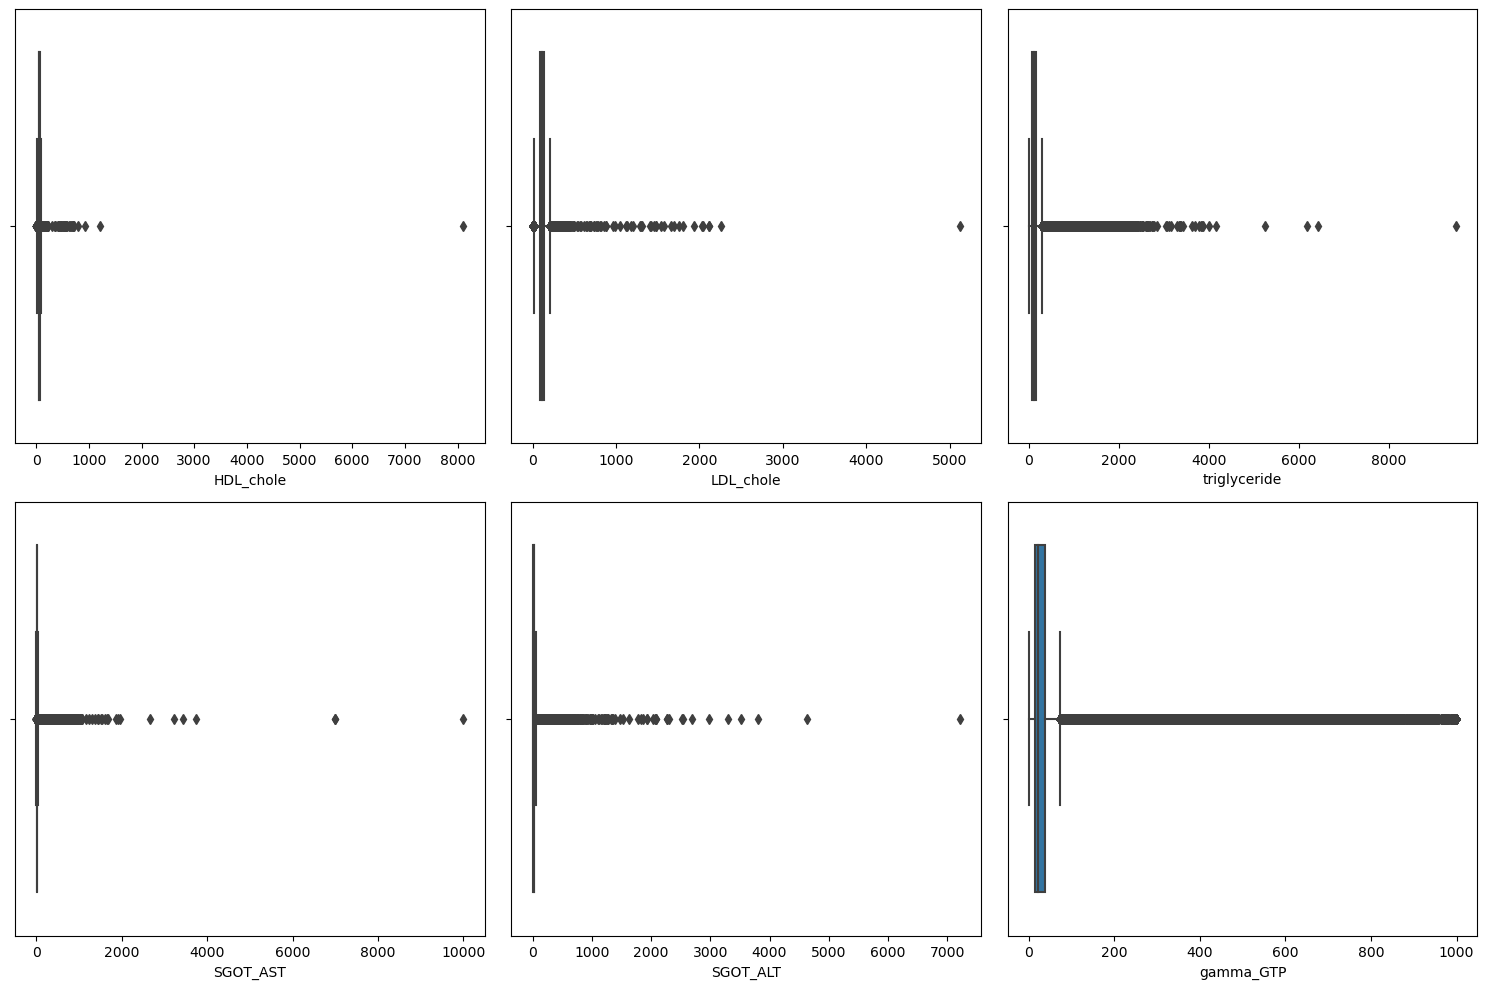

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns



# List of variables to plot for outliers
variables = ['HDL_chole', 'LDL_chole', 'triglyceride', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP']

# Setting up the figure size and layout
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables):
    plt.subplot(2, 3,i+1)
    sns.boxplot(x=dataFrame[var])

plt.tight_layout()
plt.show()

In [10]:
for col in ['HDL_chole', 'LDL_chole', 'triglyceride', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP']:
    # Calculate IQR
    Q1 = dataFrame[col].quantile(0.25)
    Q3 = dataFrame[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for extreme outliers
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    
    # Filter out extreme outliers
    dataFrame = dataFrame[(dataFrame[col] >= lower_bound) & (dataFrame[col] <= upper_bound)]

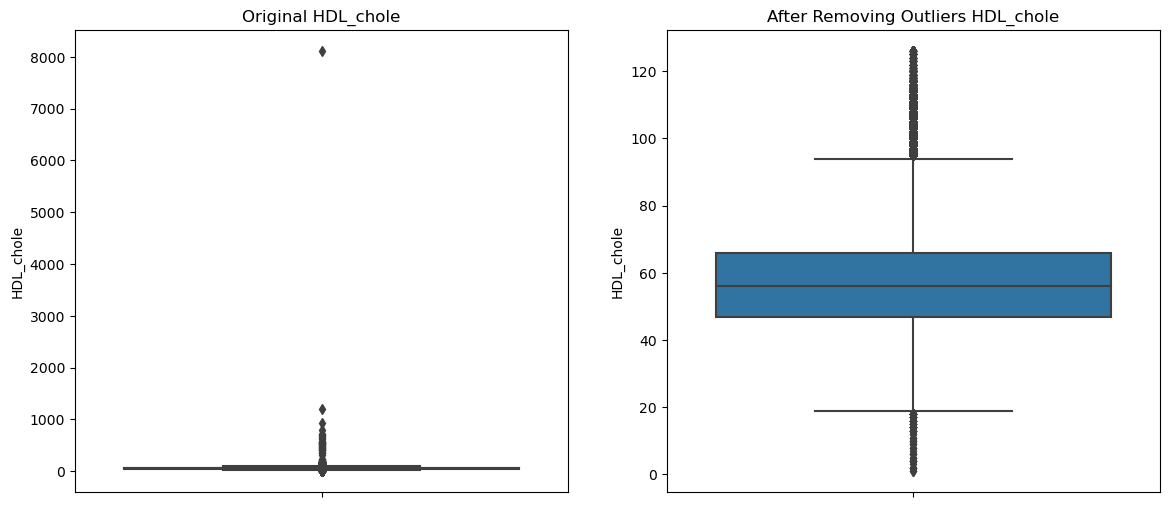

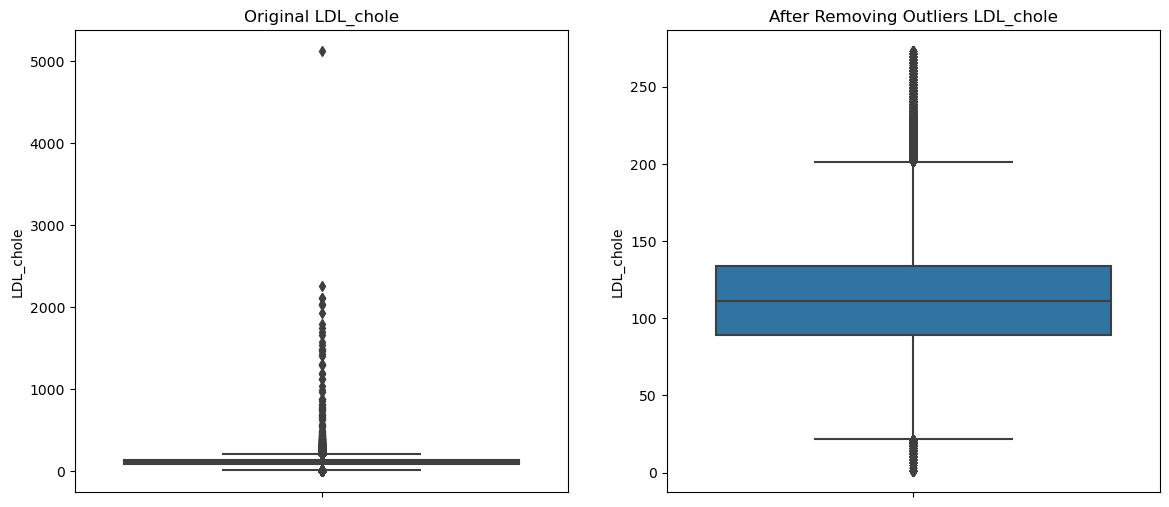

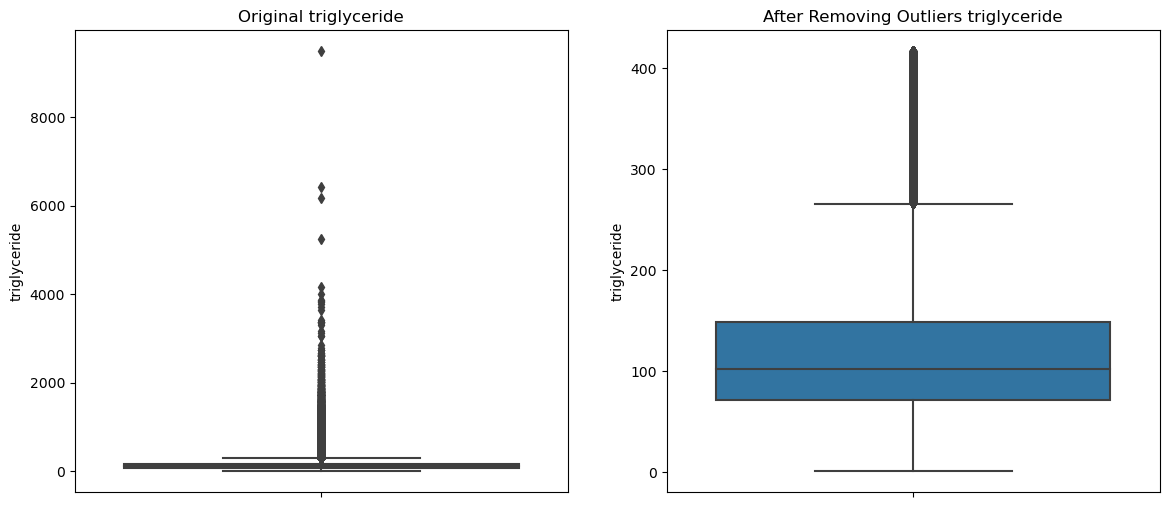

In [11]:
 import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


original_dataFrame = pd.read_csv('smoking_driking_dataset_Ver01.csv')
dataFrame = dataFrame


for col in ['HDL_chole', 'LDL_chole', 'triglyceride']:
    plt.figure(figsize=(14, 6))

    # Plot before removing outliers
    plt.subplot(1, 2, 1)
    sns.boxplot(y=original_dataFrame[col])
    plt.title(f'Original {col}')

    # Plot after removing outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(y=dataFrame[col])
    plt.title(f'After Removing Outliers {col}')

    plt.show()

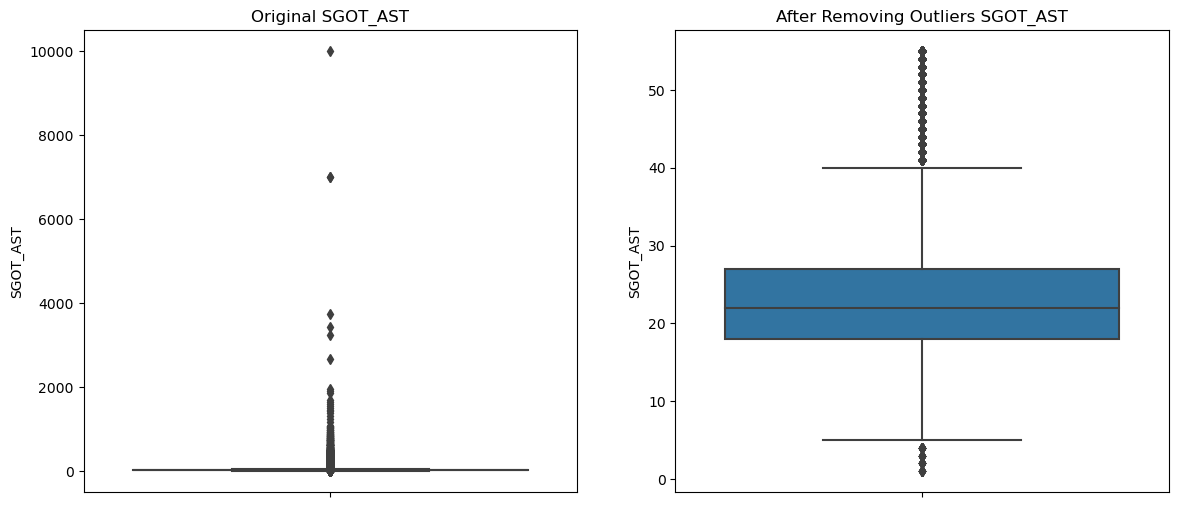

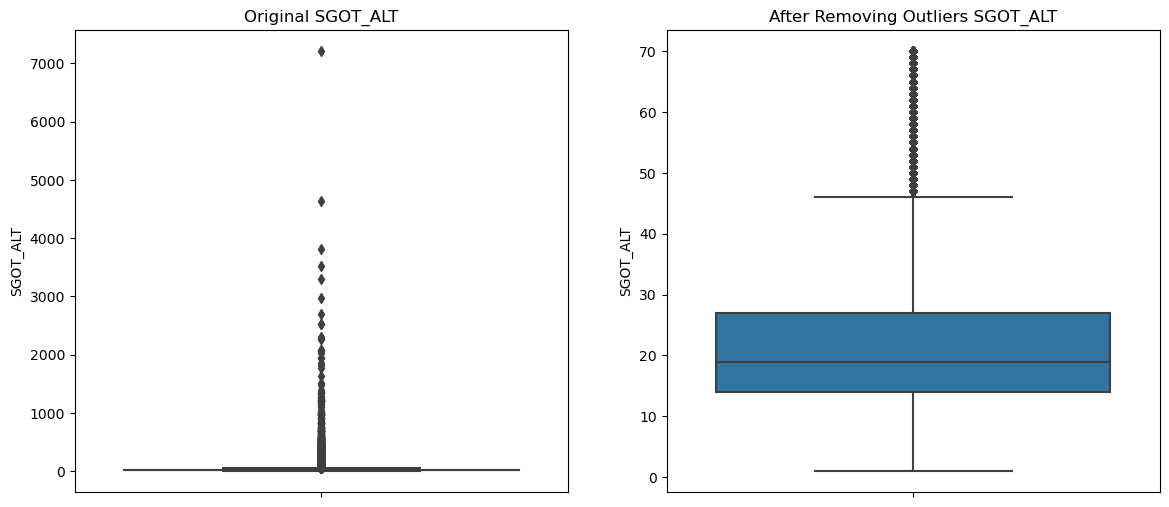

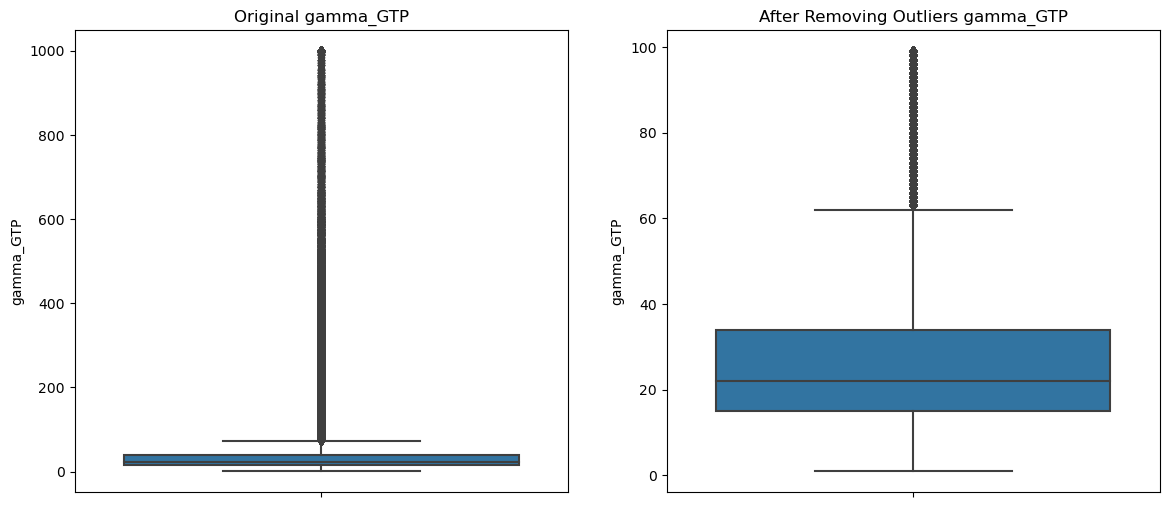

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


original_dataFrame = pd.read_csv('smoking_driking_dataset_Ver01.csv')
dataFrame = dataFrame



for col in ['SGOT_AST', 'SGOT_ALT', 'gamma_GTP']:
    plt.figure(figsize=(14, 6))

    # Plot before removing outliers
    plt.subplot(1, 2, 1)
    sns.boxplot(y=original_dataFrame[col])
    plt.title(f'Original {col}')

    # Plot after removing outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(y=dataFrame[col])
    plt.title(f'After Removing Outliers {col}')

    plt.show()

In [ ]:
#Correlation Matrix Analysis


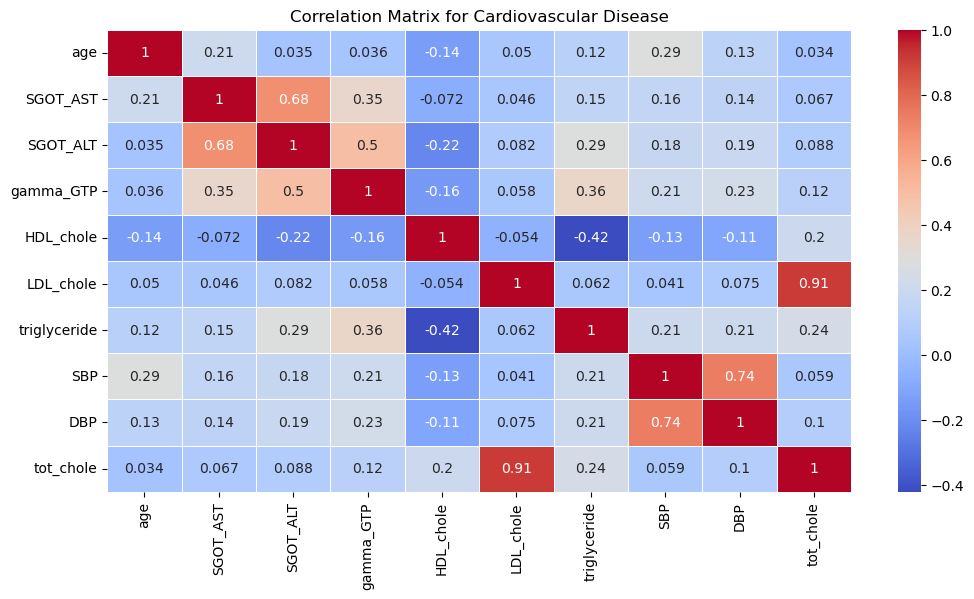

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Select variables related to CVD
variables_cvd = ['age', 'sex','SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'HDL_chole', 'LDL_chole', 'triglyceride', 'SMK_stat_type_cd', 'DRK_YN', 'SBP', 'DBP', 'tot_chole']

# Calculate the correlation matrix
corr_matrix_cvd = dataFrame[variables_cvd].corr(numeric_only=True)

# Create a heatmap for visualization
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix_cvd, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for Cardiovascular Disease')
plt.show()

In [ ]:
#Smoking and Drinking Status Distribution


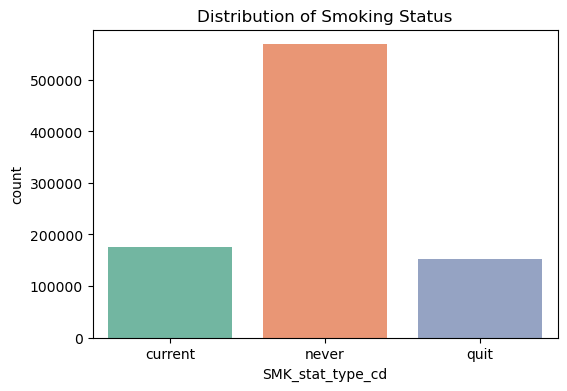

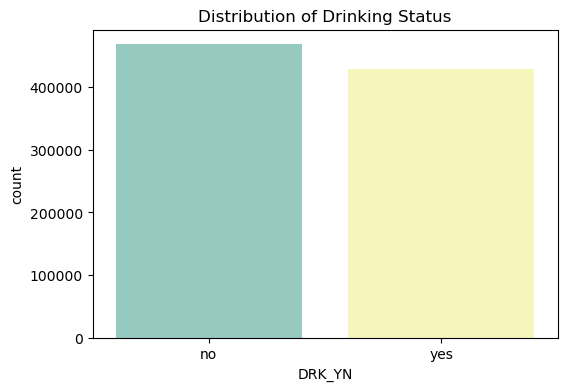

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='SMK_stat_type_cd', data=dataFrame, palette='Set2')
plt.title("Distribution of Smoking Status")
plt.show()

# Bar Plot for Drinking Status
plt.figure(figsize=(6, 4))
sns.countplot(x='DRK_YN', data=dataFrame, palette='Set3')
plt.title("Distribution of Drinking Status")
plt.show()

In [ ]:
#Age-Specific Smoking Trends

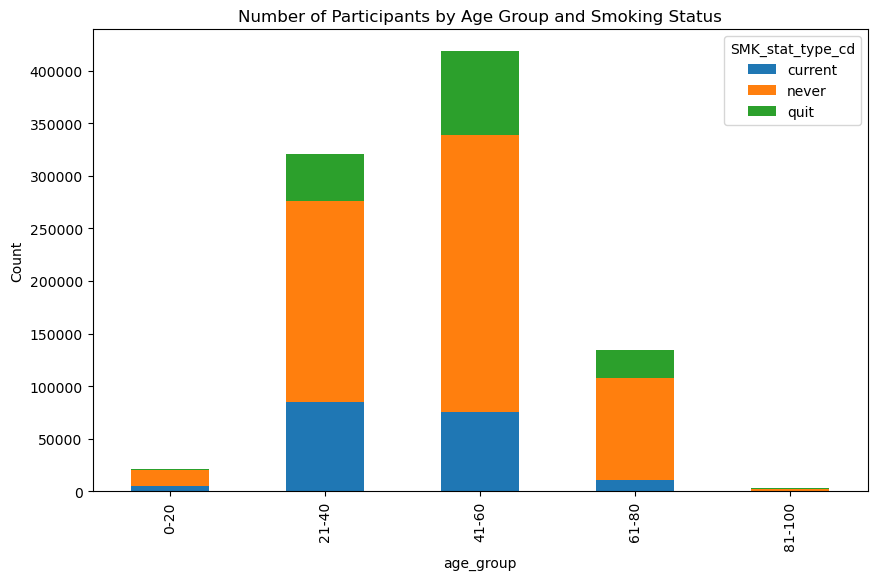

In [17]:

summary_df = dataFrame.groupby(['age_group', 'SMK_stat_type_cd'])['sex'].count().unstack().fillna(0)

# Plot a stacked bar chart
summary_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Number of Participants by Age Group and Smoking Status')
plt.ylabel('Count')
plt.show()

In [ ]:
#Boxplot Insights: Correlating Health Metrics with Smoking and Drinking Behaviors


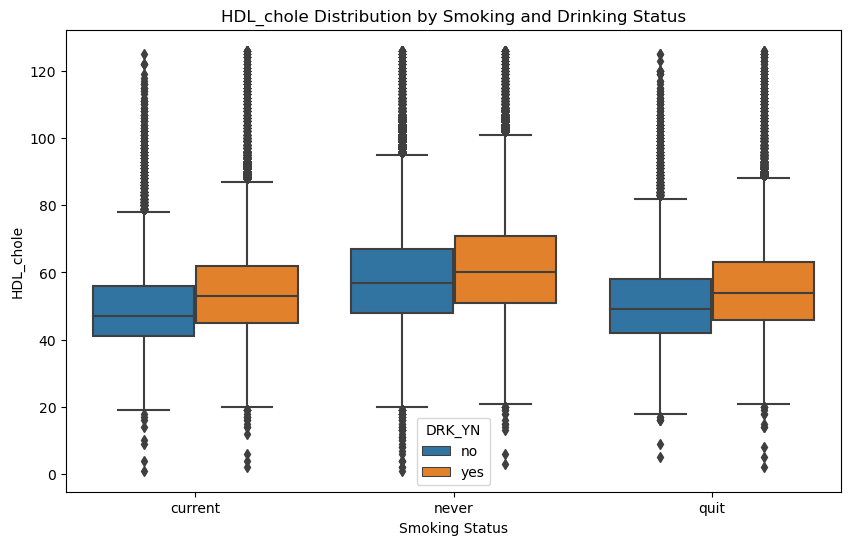

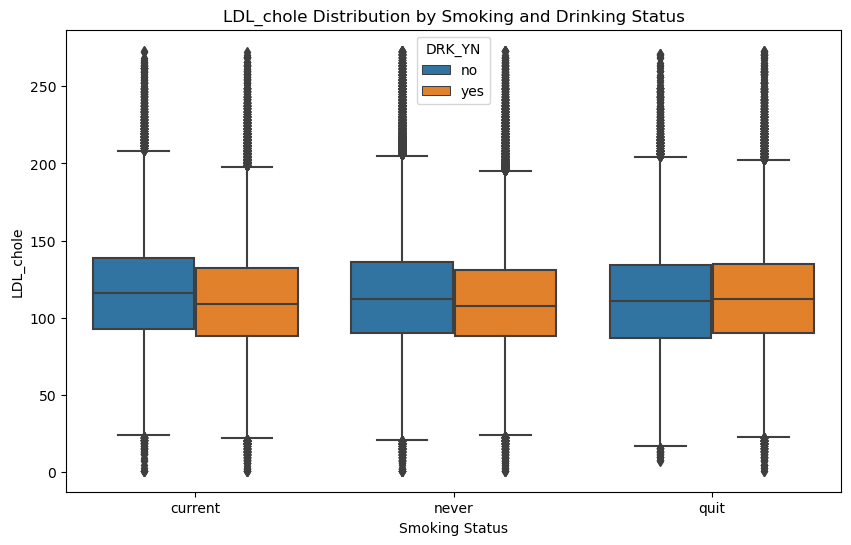

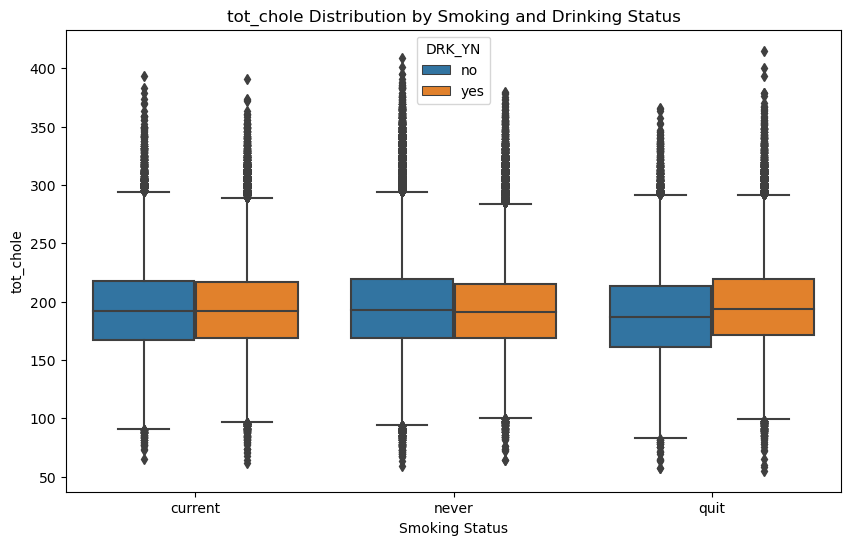

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt


health_metrics = ['HDL_chole', 'LDL_chole','tot_chole']

# Create box plots for each health metric
for metric in health_metrics:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='SMK_stat_type_cd', y=metric, hue='DRK_YN', data=dataFrame)
    plt.title(f'{metric} Distribution by Smoking and Drinking Status')
    plt.ylabel(f'{metric}')
    plt.xlabel('Smoking Status')
    plt.show()

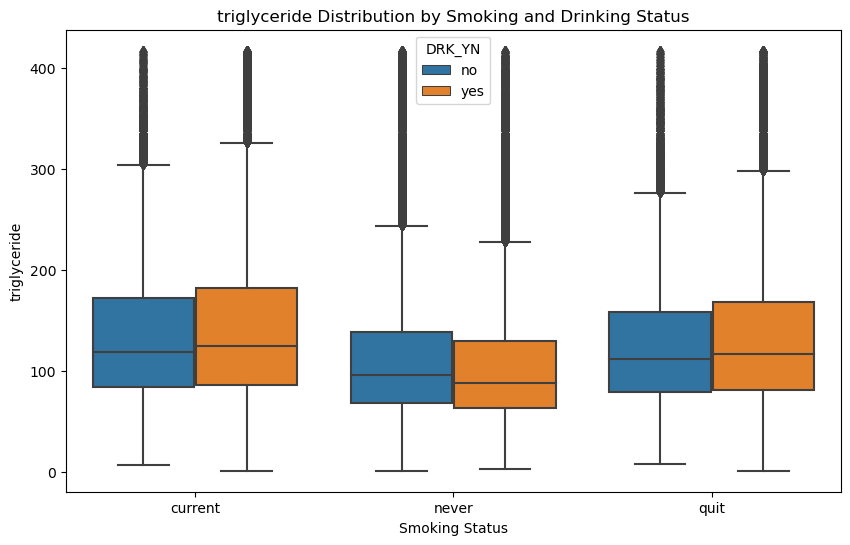

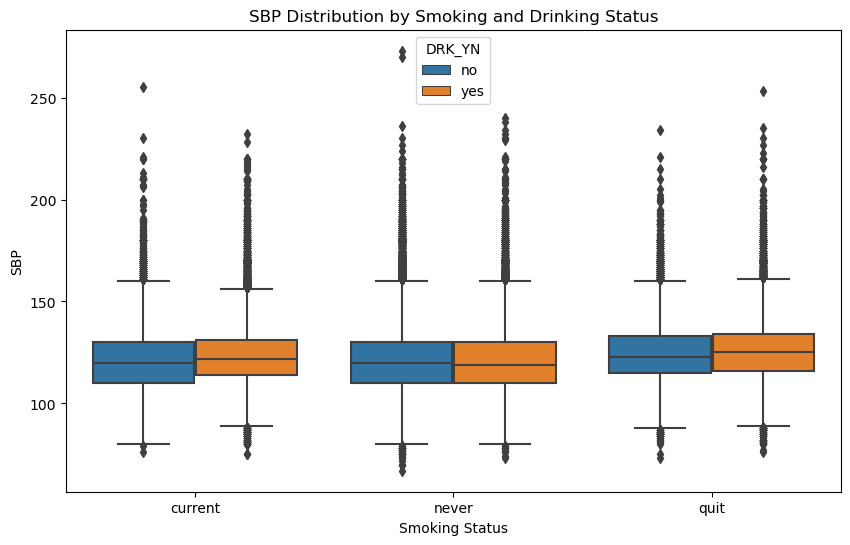

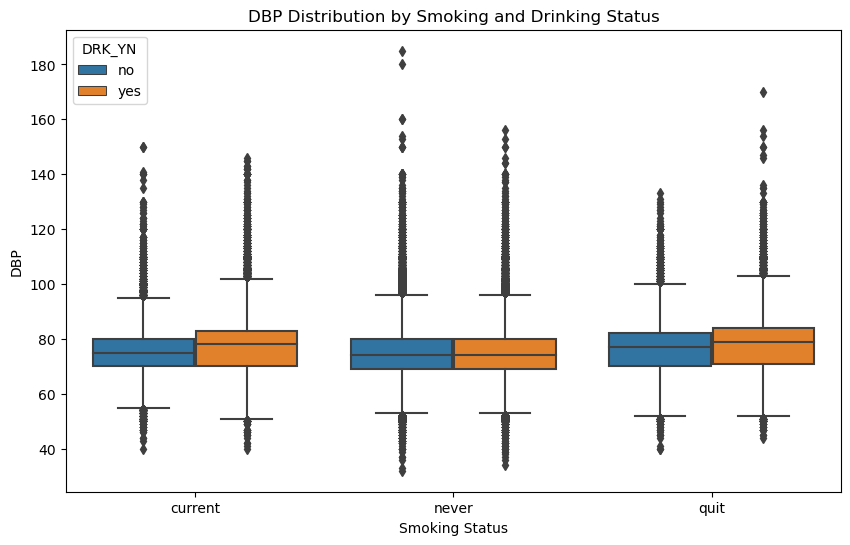

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the health metrics to visualize
health_metrics = ['triglyceride', 'SBP', 'DBP']

# Create box plots for each health metric
for metric in health_metrics:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='SMK_stat_type_cd', y=metric, hue='DRK_YN', data=dataFrame)
    plt.title(f'{metric} Distribution by Smoking and Drinking Status')
    plt.ylabel(f'{metric}')
    plt.xlabel('Smoking Status')
    plt.show()

In [ ]:
#

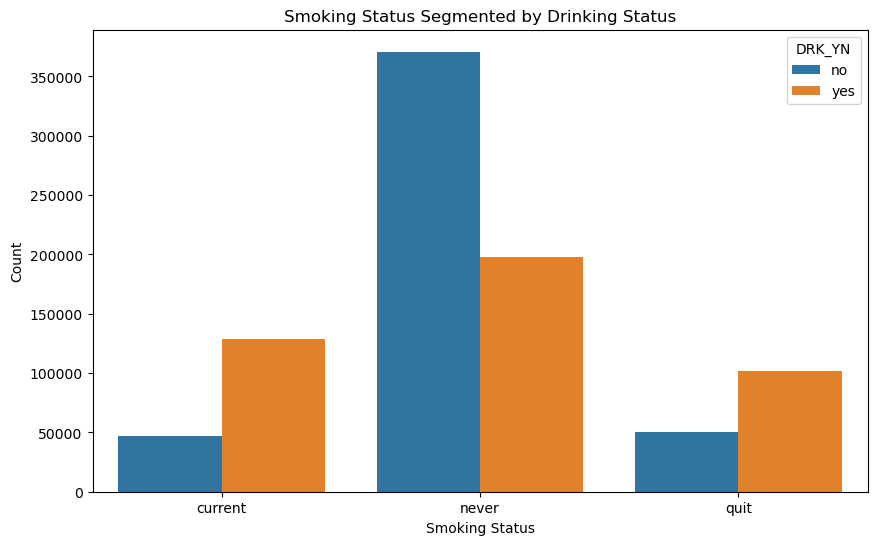

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='SMK_stat_type_cd', hue='DRK_YN', data=dataFrame)
plt.title('Smoking Status Segmented by Drinking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

In [ ]:
#Evaluating Health Metrics in Relation to Smoking Status: A T-Test and P-Value Analysis


In [52]:
from scipy.stats import ttest_ind


variables_to_test = ['tot_chole','HDL_chole', 'LDL_chole','SBP', 'DBP', 'gamma_GTP', 'SGOT_AST', 'SGOT_ALT','triglyceride']

for variable in variables_to_test:
    smokers = dataFrame[dataFrame['SMK_stat_type_cd'] == 'current'][variable].dropna()
    non_smokers = dataFrame[dataFrame['SMK_stat_type_cd'] != 'current'][variable].dropna()

    # Perform t-test
    t_stat, p_val = ttest_ind(smokers, non_smokers)
    print(f"T-test for {variable} - T-statistic: {t_stat}, P-value: {p_val}")

T-test for tot_chole - T-statistic: -4.116369496478902, P-value: 3.849214461005272e-05
T-test for HDL_chole - T-statistic: -134.59647810325885, P-value: 0.0
T-test for LDL_chole - T-statistic: -6.318673042148711, P-value: 2.639417625516284e-10
T-test for SBP - T-statistic: 23.983972759800384, P-value: 4.483414163518567e-127
T-test for DBP - T-statistic: 60.607713202325094, P-value: 0.0
T-test for gamma_GTP - T-statistic: 254.55236793283186, P-value: 0.0
T-test for SGOT_AST - T-statistic: 20.855915817379053, P-value: 1.4201661054528298e-96
T-test for SGOT_ALT - T-statistic: 116.61727619314765, P-value: 0.0
T-test for triglyceride - T-statistic: 157.2391593699591, P-value: 0.0


In [ ]:
#Evaluating Health Metrics in Relation to Drinking Status: A T-Test and P-Value Analysis


In [22]:
from scipy.stats import ttest_ind

variables_to_test = ['HDL_chole', 'LDL_chole','SBP', 'DBP', 'gamma_GTP', 'SGOT_AST', 'SGOT_ALT','triglyceride']


for variable in variables_to_test:
    drinkers = dataFrame[dataFrame['DRK_YN'] == 'yes'][variable].dropna()  # Replace 'Y' with the actual value for drinkers if different
    non_drinkers = dataFrame[dataFrame['DRK_YN'] != 'yes'][variable].dropna()  # Replace 'Y' with the actual value for non-drinkers if different

    # Perform t-test
    t_stat, p_val = ttest_ind(drinkers, non_drinkers)
    print(f"T-test for {variable} among drinkers - T-statistic: {t_stat}, P-value: {p_val}")

T-test for HDL_chole among drinkers - T-statistic: 57.059790933490696, P-value: 0.0
T-test for LDL_chole among drinkers - T-statistic: -41.27069902992735, P-value: 0.0
T-test for SBP among drinkers - T-statistic: 9.37529492761307, P-value: 6.913462598864242e-21
T-test for DBP among drinkers - T-statistic: 73.47493902228825, P-value: 0.0
T-test for gamma_GTP among drinkers - T-statistic: 258.2199014575368, P-value: 0.0
T-test for SGOT_AST among drinkers - T-statistic: 18.939370979711757, P-value: 5.60215769253411e-80
T-test for SGOT_ALT among drinkers - T-statistic: 54.660939844806, P-value: 0.0
T-test for triglyceride among drinkers - T-statistic: 54.452111108932485, P-value: 0.0


In [ ]:
# splittting the data  for smoker

In [69]:
from sklearn.model_selection import train_test_split


feature_cols = ['HDL_chole', 'LDL_chole', 'triglyceride', 'SBP', 'DBP', 'gamma_GTP', 'SGOT_AST', 'SGOT_ALT']




X = dataFrame[feature_cols]
y = dataFrame['SMK_stat_type_cd']  # or 'DRK_YN' for the drinker model

# Splitting data into training and testing sets
X_train_smoker, X_test_smoker, y_train_smoker, y_test_smoker = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#scaling the data  for smoker

In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


ct = ColumnTransformer([("scale", StandardScaler(), feature_cols)], remainder='passthrough')


X_train_smoker_scaled = ct.fit_transform(X_train_smoker)
X_test_smoker_scaled = ct.transform(X_test_smoker)


X_train_smoker_scaled_df = pd.DataFrame(X_train_smoker_scaled, columns=feature_cols)
X_test_smoker_scaled_df = pd.DataFrame(X_test_smoker_scaled, columns=feature_cols)


In [ ]:
#Logistic Regression Insights for smoker


In [71]:
from sklearn.linear_model import LogisticRegression

# Fit the logistic regression model on the scaled training data
model_smoker = LogisticRegression(max_iter=1000)
model_smoker.fit(X_train_smoker_scaled_df, y_train_smoker)


LogisticRegression(max_iter=1000)

In [ ]:
#auc score calcultion  for smoker

In [72]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize the labels for multiclass AUC calculation
y_test_smoker_binarized = label_binarize(y_test_smoker, classes=['never', 'quit', 'current'])

# Predict probabilities for each class
smoker_probs_multiclass = model_smoker.predict_proba(X_test_smoker_scaled_df)

# Calculate AUC score for multiclass
smoker_auc_multiclass = roc_auc_score(y_test_smoker_binarized, smoker_probs_multiclass, multi_class='ovr')
print(f"AUC Score for Smoker Model (Multiclass): {smoker_auc_multiclass}")


AUC Score for Smoker Model (Multiclass): 0.4342592565925247


In [73]:

coef_df = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': model_smoker.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nCoefficients for each feature in the logistic regression model:")
print(coef_df)



Coefficients for each feature in the logistic regression model:
        Feature  Coefficient
5     gamma_GTP     0.314801
6      SGOT_AST    -0.183537
3           SBP    -0.144924
0     HDL_chole    -0.126362
4           DBP     0.078638
2  triglyceride     0.066322
7      SGOT_ALT     0.060816
1     LDL_chole    -0.037282


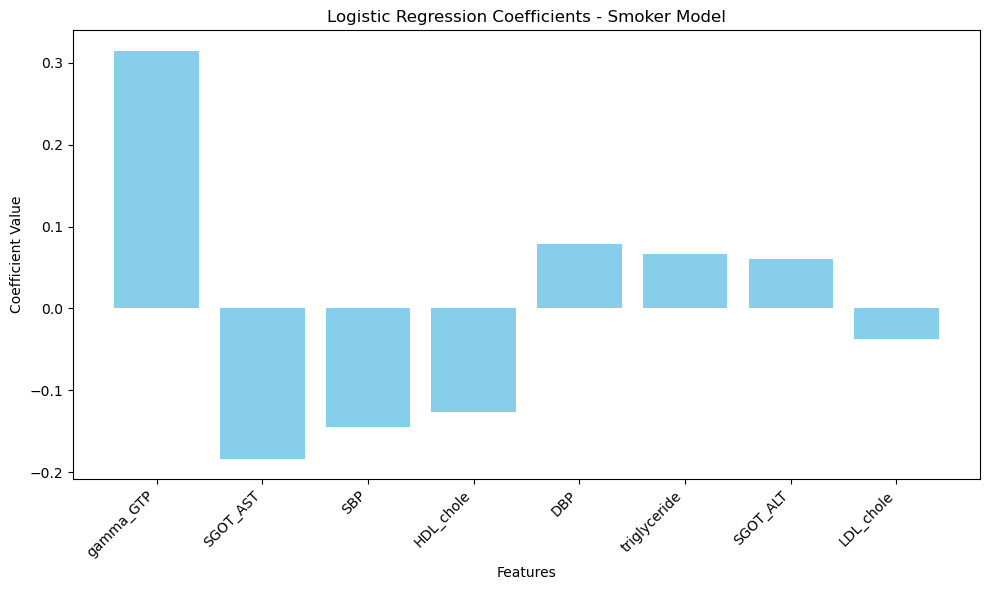

In [74]:
import matplotlib.pyplot as plt

# Plotting the coefficients as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients - Smoker Model')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()


In [ ]:
# roc curve for smoker

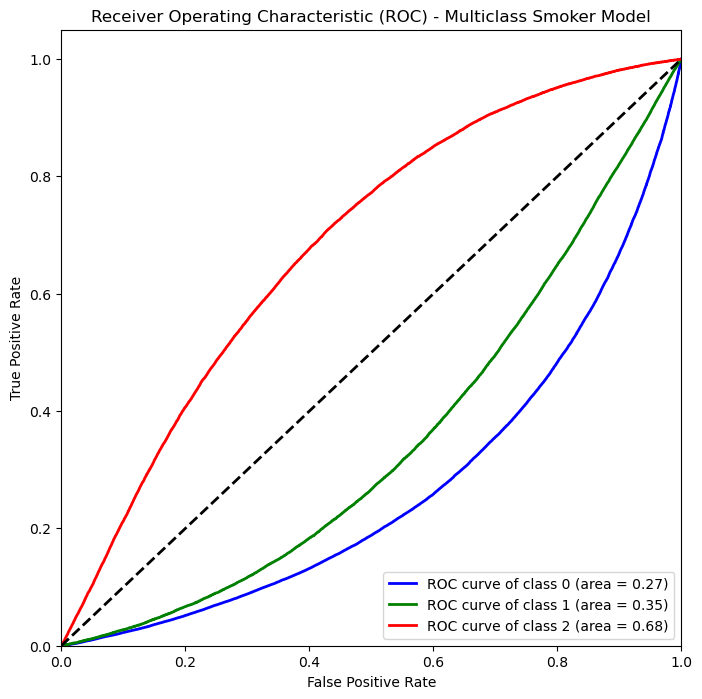

In [75]:
from sklearn.metrics import roc_curve, auc


tpr = dict()
roc_auc = dict()
n_classes = y_test_smoker_binarized.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_smoker_binarized[:, i], smoker_probs_multiclass[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(8, 8))

colors = ['blue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Multiclass Smoker Model')
plt.legend(loc="lower right")
plt.show()


In [ ]:
#cross validation

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(dataFrame['SMK_stat_type_cd'])


pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Perform cross-validation and calculate the AUC score for each fold
auc_scores = cross_val_score(pipeline, X, y_encoded, cv=10, scoring='roc_auc_ovr')

# Print the AUC scores for each fold and their mean
print("AUC scores for each fold:", auc_scores)
print("Mean AUC score:", auc_scores.mean())



AUC scores for each fold: [0.70644787 0.70674365 0.70556413 0.70421575 0.70678512 0.70494311
 0.70290389 0.70862253 0.70499729 0.70480093]
Mean AUC score: 0.7056024280665881


In [ ]:
# splitting data , scaling it and performing logistic regression and calculating auc score for dinkers

In [86]:


# Scale the features and keep them as DataFrames
scaler = StandardScaler()
X_train_drinker_scaled = scaler.fit_transform(X_train_drinker[feature_cols])
X_test_drinker_scaled = scaler.transform(X_test_drinker[feature_cols])

# Convert the scaled arrays back into DataFrames with column names
X_train_drinker_scaled_df = pd.DataFrame(X_train_drinker_scaled, columns=feature_cols)
X_test_drinker_scaled_df = pd.DataFrame(X_test_drinker_scaled, columns=feature_cols)

# Fit the logistic regression model on the scaled DataFrame
model_drinker = LogisticRegression(max_iter=1000)
model_drinker.fit(X_train_drinker_scaled_df, y_train_drinker)


# Calculate the predicted probabilities and AUC on the scaled DataFrame
y_pred_proba = model_drinker.predict_proba(X_test_drinker_scaled_df)[:, 1]
auc_score = roc_auc_score(y_test_drinker, y_pred_proba)

# Display the AUC score
print(f"AUC Score for Drinker Model: {auc_score:.4f}")

# Create a DataFrame for the coefficients
coef_df = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': model_drinker.coef_[0]
})

# Display the coefficients DataFrame
print("\nCoefficients for each feature in the logistic regression model:")
print(coef_df)


AUC Score for Drinker Model: 0.6872

Coefficients for each feature in the logistic regression model:
        Feature  Coefficient
0     HDL_chole     0.207087
1     LDL_chole    -0.124485
2  triglyceride     0.004123
3           SBP    -0.251613
4           DBP     0.255192
5     gamma_GTP     0.755881
6      SGOT_AST    -0.117200
7      SGOT_ALT    -0.108605


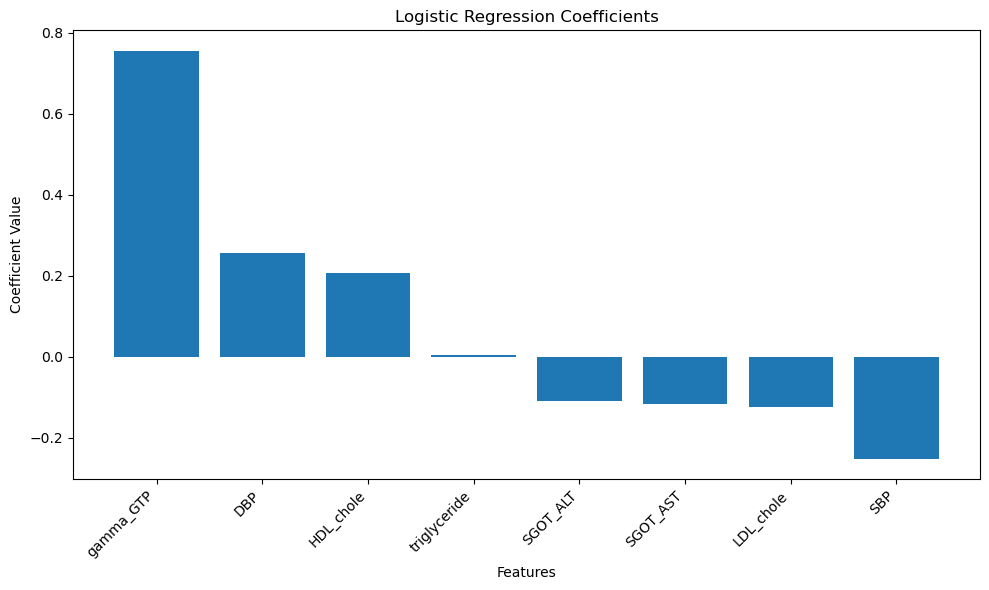

In [91]:
import matplotlib.pyplot as plt

# Assuming coef_df is the DataFrame containing your features and coefficients
coef_df = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': model_drinker.coef_[0]
})

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Plotting the coefficients as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.xticks(rotation=45, ha='right')  # Rotate feature names for better readability
plt.tight_layout()  # Adjust layout to fit all feature names
plt.show()

In [ ]:
#cross validation for drinkers

In [81]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# Create a pipeline for scaling and logistic regression
pipeline_drinker = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Perform cross-validation using AUC as the scoring metric
cv_scores_drinker = cross_val_score(pipeline_drinker, X_drinker, y_drinker, cv=10, scoring='roc_auc')

print("Cross-validation AUC scores:", cv_scores_drinker)
print("Mean cross-validation AUC:", cv_scores_drinker.mean())


Cross-validation AUC scores: [0.68201443 0.68840687 0.68824838 0.6841579  0.68660281 0.68795381
 0.68609426 0.68800832 0.68649776 0.68656045]
Mean cross-validation AUC: 0.6864544984617484


In [ ]:
#roc curve for drinkers1

/Users/duraimurganayyamperumal/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


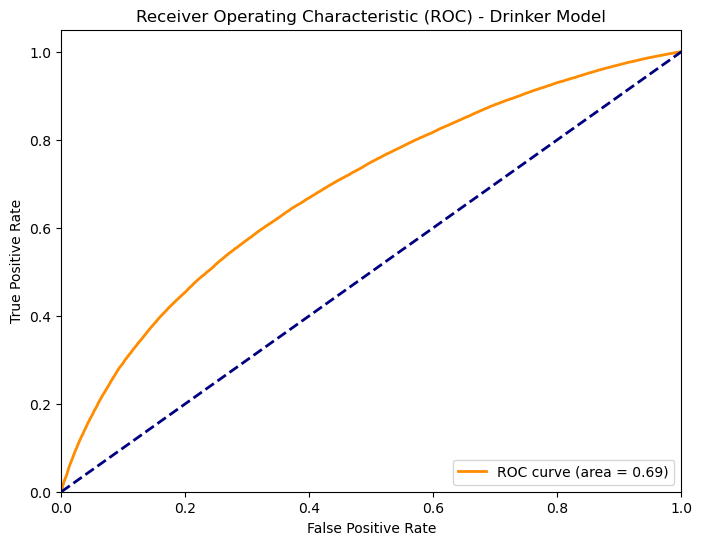

In [84]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Convert categorical labels to numeric
y_test_drinker_numeric = y_test_drinker.map({'yes': 1, 'no': 0})

# Predict probabilities for the positive class
drinker_probs = model_drinker.predict_proba(X_test_drinker_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_drinker_numeric, drinker_probs)

# Calculate AUC
drinker_auc = roc_auc_score(y_test_drinker_numeric, drinker_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % drinker_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Drinker Model')
plt.legend(loc="lower right")
plt.show()
